In [1]:
from SciComp.bvp import BVP
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
from math import ceil

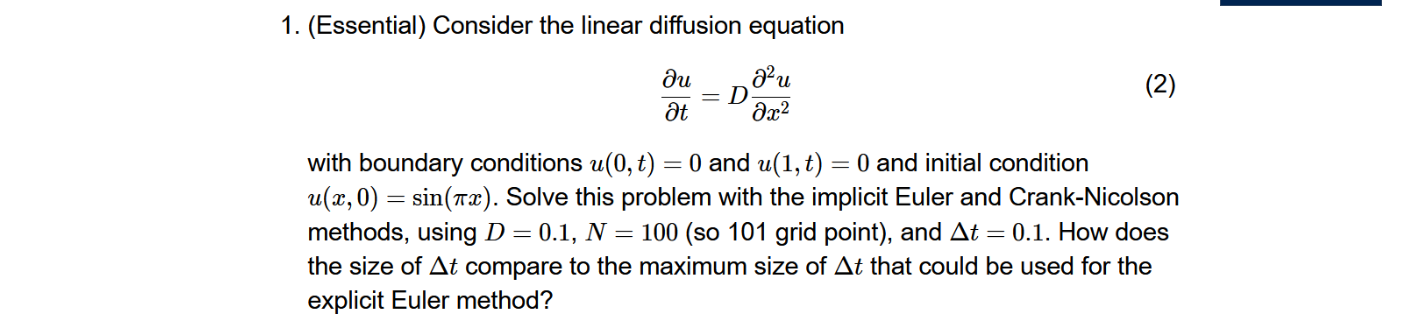

In [2]:
# solve_ivp
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
dt = 2
# C = 0.55
t_final = 2

solution, t, dt, C = bvp.solve_PDE(t_boundary, t_final, dt=dt, method='Scipy Solver')

idx = np.where(bvp.x_values == 0.5)[0][0]
print('x: ', bvp.x_values[idx], 't: ', t[-1])

numeric_scipy = solution[idx, -1]
exact = np.exp(-0.2 * np.pi**2)

# Error magnitude
print('Numeric solution: ', numeric_scipy)
print('Exact solution: ', exact)
print('Close: ', np.isclose(numeric_scipy, exact, rtol=1e-3))

error = np.abs(numeric_scipy - exact)
error_mag = np.log10(error)
print('Error magnitude: ', error_mag)


c:\Users\duppu\Documents\EMAT3008-ScientificComputing\SciComp\bvp.py:706: UserWarning: C = D * dt / dx^2 = 8000.0 > 0.5. The solution may be unstable.
  warnings.warn('C = D * dt / dx^2 = {} > 0.5. The solution may be unstable.'.format(C))


x:  0.5 t:  2
Numeric solution:  0.13889771911870477
Exact solution:  0.13891113314280026
Close:  True
Error magnitude:  -4.872440917875333


In [4]:
# Explicit Euler
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
C = 0.5
t_final = 2

solution, t, dt, C = bvp.solve_PDE(t_boundary, t_final, C=C, method='Explicit Euler')

idx = np.where(bvp.x_values == 0.5)[0][0]
print('x: ', bvp.x_values[idx], 't: ', t[-1])

numeric_explicit = solution[idx, -1]
exact = np.exp(-0.2 * np.pi**2)

# Error magnitude
print('Numeric solution: ', numeric_explicit)
print('Exact solution: ', exact)
print('Close: ', np.isclose(numeric_explicit, exact, rtol=1e-3))

error = np.abs(numeric_explicit - exact)
error_mag = np.log10(error)
print('Error magnitude: ', error_mag)


x:  0.5 t:  2.0
Numeric solution:  0.13410774607765996
Exact solution:  0.13891113314280026
Close:  False
Error magnitude:  -2.3184524157592294


In [4]:
print('Shape of solution: ', solution.shape)

Shape of solution:  (201, 16001)


In [5]:
# Implicit Euler method
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
dt = 0.0005
t_final = 2

solution, t, dt, C = bvp.solve_PDE(t_boundary, t_final, C=C, method='Implicit Euler')

idx = np.where(bvp.x_values == 0.5)[0][0]
print('x: ', bvp.x_values[idx], 't: ', t[-1])
numeric_implicit = solution[idx, -1]

print('Numeric solution: ', numeric_implicit)
print('Exact solution: ', exact)
print('Close: ', np.isclose(numeric_implicit, exact, rtol=1e-3))

error = np.abs(numeric_implicit - exact)
error_mag = np.log10(error)
print('Error magnitude: ', error_mag)

x:  0.5 t:  2.0
Numeric solution:  0.13893368485244303
Exact solution:  0.13891113314280026
Close:  True
Error magnitude:  -4.646820528718319


In [6]:
# Crank-Nicolson method
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
dt = 0.04
t_final = 2

solution, t, dt, C = bvp.solve_PDE(t_boundary, t_final, dt=dt, method='Crank-Nicolson')


idx = np.where(bvp.x_values == 0.5)[0][0]
print('x: ', bvp.x_values[idx], 't: ', t[-1])
numeric_crank = solution[idx, -1]

print('Numeric solution: ', numeric_crank)
print('Exact solution: ', exact)

error = np.abs(numeric_crank - exact)
error_mag = np.log10(error)
print('Error magnitude: ', error_mag)

x:  0.5 t:  2.0
Numeric solution:  0.13888115549425914
Exact solution:  0.13891113314280026
Error magnitude:  -4.523202436386534


c:\Users\duppu\Documents\EMAT3008-ScientificComputing\SciComp\bvp.py:706: UserWarning: C = D * dt / dx^2 = 160.0 > 0.5. The solution may be unstable.
  warnings.warn('C = D * dt / dx^2 = {} > 0.5. The solution may be unstable.'.format(C))


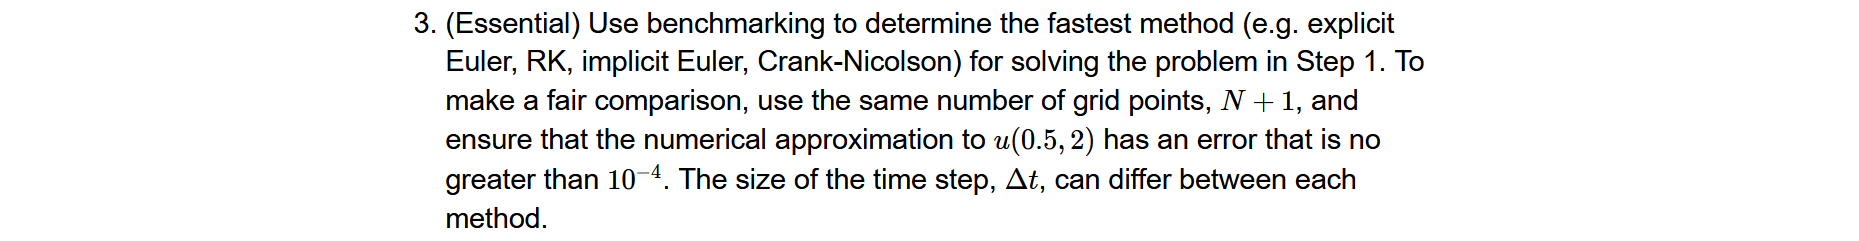

In [37]:
import timeit



In [57]:
# Benchmarking

# ----------------- Scipy -----------------
print('----------------- Scipy -----------------')
setup_code = '''
from SciComp.bvp import BVP
import numpy as np
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
# dt = 2
C = 0.5
t_final = 2

t, dt, C = bvp.time_discretization(t_boundary, t_final, C=C)'''

timed_code = '''
solution = bvp.scipy_solver(t)'''

scipy_time = timeit.timeit(setup=setup_code, stmt=timed_code, number=3)

# ----------------- Explicit Euler -----------------
print('----------------- Explicit Euler -----------------')
setup_code = '''
from SciComp.bvp import BVP
import numpy as np
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
C = 0.5
t_final = 2

t, dt, C = bvp.time_discretization(t_boundary, t_final, C=C)'''

timed_code = '''
solution = bvp.explicit_euler(t) '''

explicit_time = timeit.timeit(setup=setup_code, stmt=timed_code, number=3)

# ----------------- Implicit Euler -----------------
print('----------------- Implicit Euler -----------------')
setup_code = '''
from SciComp.bvp import BVP
import numpy as np
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
dt = 0.0005
t_final = 2

t, dt, C = bvp.time_discretization(t_boundary, t_final, dt=dt)'''

timed_code = '''
solution = bvp.implicit_euler(t) '''

implicit_time = timeit.timeit(setup=setup_code, stmt=timed_code, number=3)

# ----------------- Crank-Nicolson -----------------
print('----------------- Crank-Nicolson -----------------')
setup_code = '''
from SciComp.bvp import BVP
import numpy as np
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
dt = 0.04
t_final = 2

t, dt, C = bvp.time_discretization(t_boundary, t_final, dt=dt)'''

timed_code = '''
solution = bvp.crank_nicolson(t) '''

crank_time = timeit.timeit(setup=setup_code, stmt=timed_code, number=3)


----------------- Scipy -----------------
----------------- Explicit Euler -----------------
----------------- Implicit Euler -----------------
----------------- Crank-Nicolson -----------------


In [58]:
# ----------------- Results -----------------
print('----------------- Results -----------------')
print('Scipy:          ', scipy_time)
print('Explicit Euler: ', explicit_time)
print('Implicit Euler: ', implicit_time)
print('Crank-Nicolson: ', crank_time)


----------------- Results -----------------
Scipy:           13.292963500018232
Explicit Euler:  15.264792300004046
Implicit Euler:  5.540766999998596
Crank-Nicolson:  0.07074609998380765


In [61]:
import cProfile

pr = cProfile.Profile()
pr.enable()

# Explicit Euler
a = 0
b = 1
alpha = 0
beta = 0
N = 200
D = 0.1

f_fun = lambda x, t: np.sin(np.pi * x)

bvp = BVP(a, b, N, alpha, beta, D=D, condition_type='Dirichlet', f_fun=f_fun)

t_boundary = 0
C = 0.5
t_final = 2

t, dt, C = bvp.time_discretization(t_boundary, t_final, C=C)

solution = bvp.explicit_euler(t)

idx = np.where(bvp.x_values == 0.5)[0][0]
print('x: ', bvp.x_values[idx], 't: ', t[-1])

numeric_explicit = solution[idx, -1]
exact = np.exp(-0.2 * np.pi**2)

# Error magnitude
print('Numeric solution: ', numeric_explicit)
print('Exact solution: ', exact)
print('Close: ', np.isclose(numeric_explicit, exact, rtol=1e-3))

error = np.abs(numeric_explicit - exact)
error_mag = np.log10(error)
print('Error magnitude: ', error_mag)

pr.disable()
pr.print_stats(sort='cumtime')

x:  0.5 t:  2.0
Numeric solution:  0.1388998568525101
Exact solution:  0.13891113314280026
Close:  True
Error magnitude:  -4.947833752435874
         743 function calls (737 primitive calls) in 5.379 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       24    0.000    0.000    5.380    0.224 interactiveshell.py:3406(run_code)
       24    0.000    0.000    5.380    0.224 {built-in method builtins.exec}
        1    5.376    5.376    5.376    5.376 bvp.py:510(explicit_euler)
       24    0.000    0.000    0.001    0.000 codeop.py:117(__call__)
       24    0.001    0.000    0.001    0.000 {built-in method builtins.compile}
        1    0.000    0.000    0.001    0.001 bvp.py:430(time_discretization)
      9/3    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 bvp.py:49(__init__)
        1    0.000    0.000    0.000    0.